<a href="https://colab.research.google.com/github/ariahosseini/DeepML/blob/main/000_TensorFlow_Proj_Zero_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utils

In [1]:
# utils
import os, sys
import pprint
import pandas as pd
import numpy as np
# sklearn
from sklearn.preprocessing import MaxAbsScaler
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist, cifar10
# google
from google.colab import drive
# vis
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.17.0


In [4]:
# gpu
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
# environ
pprint.pprint(dict(os.environ), width = 1)

{'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events '
                         '/var/colab/cgroup/jupyter-children/memory.events',
 'CLICOLOR': '1',
 'CLOUDSDK_CONFIG': '/content/.config',
 'CLOUDSDK_PYTHON': 'python3',
 'COLAB_BACKEND_VERSION': 'next',
 'COLAB_DEBUG_ADAPTER_MUX_PATH': '/usr/local/bin/dap_multiplexer',
 'COLAB_FILE_HANDLER_ADDR': 'localhost:3453',
 'COLAB_GPU': '1',
 'COLAB_JUPYTER_IP': '172.28.0.12',
 'COLAB_JUPYTER_TOKEN': '',
 'COLAB_JUPYTER_TRANSPORT': 'ipc',
 'COLAB_KERNEL_MANAGER_PROXY_HOST': '172.28.0.12',
 'COLAB_KERNEL_MANAGER_PROXY_PORT': '6000',
 'COLAB_LANGUAGE_SERVER_PROXY': '/usr/colab/bin/language_service',
 'COLAB_LANGUAGE_SERVER_PROXY_LSP_DIRS': '/datalab/web/pyright/typeshed-fallback/stdlib,/usr/local/lib/python3.10/dist-packages',
 'COLAB_LANGUAGE_SERVER_PROXY_REQUEST_TIMEOUT': '30s',
 'COLAB_LANGUAGE_SERVER_PROXY_ROOT_URL': 'http://172.28.0.1:8013/',
 'COLAB_RELEASE_TAG': 'release-colab_20240829-060138_RC00',
 'COLAB_TPU_1VM': '',
 'COLAB_WARMUP_

In [6]:
# tensorflow verbos
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [7]:
# google drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic Calculations

In [8]:
# tf constant tensors
print(tf.constant(4, shape = (1,), dtype = tf.float16))
print(tf.constant(4, shape = (1,1), dtype = tf.float16))
print(tf.constant(4, shape = (1,2), dtype = tf.float16))
print(tf.constant(4, shape = (2,1), dtype = tf.float16))
print(tf.constant(4, shape = (2,2), dtype = tf.float16))

tf.Tensor([4.], shape=(1,), dtype=float16)
tf.Tensor([[4.]], shape=(1, 1), dtype=float16)
tf.Tensor([[4. 4.]], shape=(1, 2), dtype=float16)
tf.Tensor(
[[4.]
 [4.]], shape=(2, 1), dtype=float16)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float16)


In [9]:
# tensors shape
print(tf.constant([1,2,3], shape = (1,3), dtype = tf.int8))
print(tf.constant([1,2,3], shape = (3,), dtype = tf.int8))
print(tf.constant([1,2,3], shape = (3,1), dtype = tf.int8))
print(tf.constant([1,2,3], shape = (1,1,3), dtype = tf.int8))
print(tf.constant([1,2,3], shape = (1,3,1), dtype = tf.int8))
print(tf.constant([1,2,3], shape = (3,1,1), dtype = tf.int8))

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int8)
tf.Tensor([1 2 3], shape=(3,), dtype=int8)
tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int8)
tf.Tensor([[[1 2 3]]], shape=(1, 1, 3), dtype=int8)
tf.Tensor(
[[[1]
  [2]
  [3]]], shape=(1, 3, 1), dtype=int8)
tf.Tensor(
[[[1]]

 [[2]]

 [[3]]], shape=(3, 1, 1), dtype=int8)


In [10]:
# tf.constant length
x = tf.constant([[1,2,3], [3,5,7]], shape = (3,2), dtype = tf.int8)
print(x)
x = tf.constant([[1,2,3], [3,5,7]], shape = (2,3), dtype = tf.int8)
print(x)
print("x.shape:", x.shape)
print("len(x):", len(x))
print("len(x[0]):", len(x[0]))

tf.Tensor(
[[1 2]
 [3 3]
 [5 7]], shape=(3, 2), dtype=int8)
tf.Tensor(
[[1 2 3]
 [3 5 7]], shape=(2, 3), dtype=int8)
x.shape: (2, 3)
len(x): 2
len(x[0]): 3


In [11]:
# special tensors
print(tf.ones((2,3)))
print(tf.eye(3))
print(tf.zeros((3,2)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


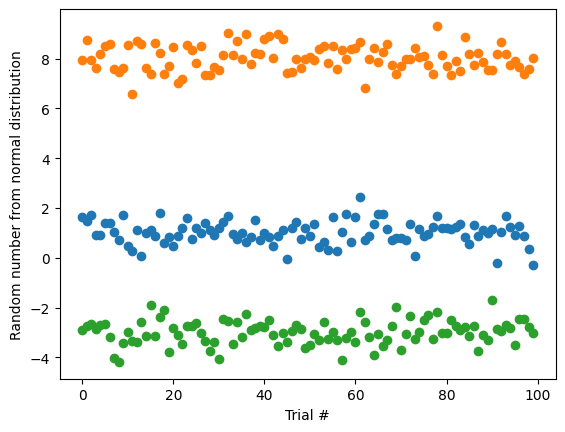

In [12]:
# tf.random.normal
x = tf.random.normal((3,100), mean = [[1],[8],[-3]], stddev = 0.5)
for _ in x:
  plt.plot(_,'o')
plt.xlabel("Trial #")
plt.ylabel("Random number from normal distribution")
plt.show()

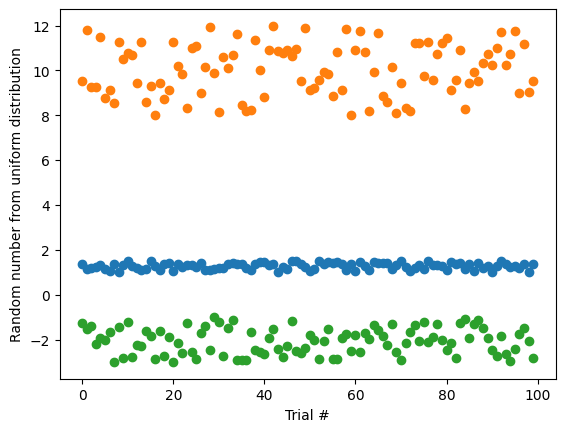

In [13]:
# tf.random.uniform
x = tf.random.uniform((3,100), minval = [[1],[8],[-3]],
                      maxval = [[1.5],[12],[-1]])
for _ in x:
  plt.plot(_,'o')
plt.xlabel("Trial #")
plt.ylabel("Random number from uniform distribution")
plt.show()

In [14]:
# tf casting
x = tf.range(start=1, limit=8, delta=2)
print("x (int):", x)
print("x dtype:", x.dtype)
x = tf.cast(x, dtype=tf.float16)
print("x (float):", x)
print("x dtype:", x.dtype)
print("x.reshape:", tf.reshape(x,[2,-1]))
tf.print("x.reshape values:", tf.reshape(x,[2,-1]))

x (int): tf.Tensor([1 3 5 7], shape=(4,), dtype=int32)
x dtype: <dtype: 'int32'>
x (float): tf.Tensor([1. 3. 5. 7.], shape=(4,), dtype=float16)
x dtype: <dtype: 'float16'>
x.reshape: tf.Tensor(
[[1. 3.]
 [5. 7.]], shape=(2, 2), dtype=float16)
x.reshape values: [[1 3]
 [5 7]]


In [15]:
# basic math
x = tf.constant([1,2,4], shape = (1,3), dtype = tf.int8)
y = tf.constant([5,4,2], shape = (3,1), dtype = tf.int8)
print(x+y)
x = tf.constant([1,2,4], shape = (1,3), dtype = tf.float16)
y = tf.constant([5,4,2], shape = (3,1), dtype = tf.float16)
print(x+y)
print(x*y)
print(x@y)

tf.Tensor(
[[6 7 9]
 [5 6 8]
 [3 4 6]], shape=(3, 3), dtype=int8)
tf.Tensor(
[[6. 7. 9.]
 [5. 6. 8.]
 [3. 4. 6.]], shape=(3, 3), dtype=float16)
tf.Tensor(
[[ 5. 10. 20.]
 [ 4.  8. 16.]
 [ 2.  4.  8.]], shape=(3, 3), dtype=float16)
tf.Tensor([[21.]], shape=(1, 1), dtype=float16)


In [16]:
# element by element sum/multipication
x = tf.constant([1,2,4], shape = (1,3), dtype = tf.float16)
y = tf.constant([5,4,2], shape = (1,3), dtype = tf.float16)
print(x+y)
print(x*y)

tf.Tensor([[6. 6. 6.]], shape=(1, 3), dtype=float16)
tf.Tensor([[5. 8. 8.]], shape=(1, 3), dtype=float16)


In [17]:
x = tf.constant([1,2,4], shape = (1,3), dtype = tf.int8)
print(x[0,1:])

tf.Tensor([2 4], shape=(2,), dtype=int8)


In [18]:
# permutation
x = tf.constant([[[ 1,  2,  3],
                  [ 4,  5,  6]],
                 [[ 7,  8,  9],
                  [10, 11, 12]]])
tf.transpose(x, perm=[0, 2, 1], conjugate=True)

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[ 1,  4],
        [ 2,  5],
        [ 3,  6]],

       [[ 7, 10],
        [ 8, 11],
        [ 9, 12]]], dtype=int32)>

In [19]:
# import/ shrink/ enlarge images,
dir_path = "drive/MyDrive/DataSets/animals"
jpeg_file_names = []
for file in os.listdir(dir_path):
    if file.endswith('.jpg') or file.endswith('.jpeg'):
        jpeg_file_names.append(file)

img = tf.io.read_file(os.path.join(dir_path, jpeg_file_names[0]))
image = tf.image.decode_image(img, channels=3, dtype=tf.float32)
image.shape
shrinked_image = tf.image.resize(image, (64, 64), method=tf.image.ResizeMethod.MITCHELLCUBIC)
enlarged_image = tf.image.resize(image, (450, 400), method=tf.image.ResizeMethod.MITCHELLCUBIC)

In [20]:
# plot
fig, axs = plt.subplots(3, 1, figsize=(6, 8))
axs[0].imshow(image)
axs[1].imshow(shrinked_image)
axs[2].imshow(enlarged_image)
plt.tight_layout()
plt.show()

# Sequential Neural Networks

In [21]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train:", type(x_train), x_train.shape)
print("y_train:", type(y_train), y_train.shape)
print("x_test:", type(x_test), x_test.shape)
print("y_test:", type(y_test), y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train: <class 'numpy.ndarray'> (60000, 28, 28)
y_train: <class 'numpy.ndarray'> (60000,)
x_test: <class 'numpy.ndarray'> (10000, 28, 28)
y_test: <class 'numpy.ndarray'> (10000,)


In [22]:
# reshape data and scale
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [23]:
# initial sequential model
model = keras.Sequential(
    layers = [
        keras.Input(shape=(28*28,)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10)
        ], name = "Sequential_mnist"
        )
print(model.summary())
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
    )
model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Model: "Sequential_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None
1875/1875 - 5s - 3ms/step - accuracy: 0.9441 - loss: 0.1853
313/313 - 3s - 11ms/step - accuracy: 0.9685 - loss: 0.1060


[0.105994813144207, 0.968500018119812]

In [24]:
# same sequential model - different format
model = keras.Sequential(name = "Sequential_mnist")
model.add(keras.Input(shape=(28*28,)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
print(model.summary())
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
    )
model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Model: "Sequential_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
1875/1875 - 8s - 4ms/step - accuracy: 0.9449 - loss: 0.1835
Epoch 2/2
1875/1875 - 4s - 2ms/step - accuracy: 0.9757 - loss: 0.0794
313/313 - 1s - 4ms/step - accuracy: 0.9752 - loss: 0.0773


[0.07734149694442749, 0.9751999974250793]

In [25]:
# model arc
print(model.inputs)
print(model.layers)
print(model.layers[-2].output)
print(model.metrics)

[<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor_4>]
[<Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]
<KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_7>
[<Mean name=loss>, <CompileMetrics name=compile_metrics>]


In [26]:
# model config
print(model.get_config())

{'name': 'Sequential_mnist', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_na

In [27]:
# prediction
model = keras.Model(inputs=model.inputs, outputs=[model.layers[-2].output])
feature = model.predict(x_train)
print(feature.shape)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(60000, 256)


In [28]:
# model attributes
attrs = [attr for attr in dir(model) if attr.startswith("__") and not callable(getattr(model, attr))] # not working properly in new versions
for attr in attrs:
    print(f"Attribute: {attr}")

Attribute: __annotations__
Attribute: __dict__
Attribute: __doc__
Attribute: __module__
Attribute: __weakref__


# Functional Neural Networks

In [38]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [39]:
# model
inputs = keras.Input(shape=(28*28,), name="input_layer")
x = layers.Dense(512, name="first_layer", activation="relu")(inputs)
x = layers.Dense(256, name="second_layer", activation="relu")(x)
outputs = layers.Dense(10, name="output_layer", activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="func_model")
print(model.summary())
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
    )
model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Model: "func_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None
1875/1875 - 7s - 4ms/step - accuracy: 0.9426 - loss: 0.1886
313/313 - 1s - 3ms/step - accuracy: 0.9681 - loss: 0.1072


[0.10717593878507614, 0.9681000113487244]

# Functional Neural Network Multiple Outputs

In [89]:
# change dir
os.chdir('/content/drive/MyDrive/DataSets/Multi_Digit_Mnist')

In [90]:
# ls
os.listdir()

['test.csv', 'train.csv', 'test_images', 'train_images']

In [100]:
# params
BATCH_SIZE = 64
WEIGHT_DECAY = 0.001
LEARNING_RATE = 0.001
# data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_images = os.getcwd() + "/train_images/" + train_df.iloc[:, 0].values
test_images = os.getcwd() + "/test_images/" + test_df.iloc[:, 0].values
train_labels = train_df.iloc[:, 1:].values
test_labels = test_df.iloc[:, 1:].values

def read_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=1, dtype=tf.float32)
    image.set_shape((64, 64, 1))
    label[0].set_shape([])
    label[1].set_shape([])
    labels = {"first_num": label[0], "second_num": label[1]}
    return image, labels

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = (
    train_dataset.shuffle(buffer_size=len(train_labels))
    .map(read_image)
    .batch(batch_size=BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
    )

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = (
    test_dataset.map(read_image)
    .batch(batch_size=BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
    )

In [101]:
# model - Conv2D
inputs = keras.Input(shape=(64, 64, 1))
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    padding="same",
    kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(inputs)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.Conv2D(64, 3, kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
x = layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(
    64, 3, activation="relu",
    kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
output1 = layers.Dense(10, activation="softmax", name="first_num")(x)
output2 = layers.Dense(10, activation="softmax", name="second_num")(x)
model = keras.Model(inputs=inputs, outputs=[output1, output2])
model.compile(
    optimizer=keras.optimizers.Adam(LEARNING_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy", "accuracy"] # note two outputs
    )

In [102]:
model.fit(train_dataset, epochs=1, verbose=2)

4/4 - 37s - 9s/step - first_num_accuracy: 0.7200 - loss: 3.1628 - second_num_accuracy: 0.3900


In [103]:
model.evaluate(test_dataset, verbose=2)

4/4 - 3s - 632ms/step - first_num_accuracy: 1.0000 - loss: 4.3761 - second_num_accuracy: 0.0000e+00


[4.376138687133789, 1.0, 0.0]

# Convolutional Neural Network

In [29]:
# data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [30]:
# model
model = keras.Sequential(
    layers = [
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Conv2D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10)
    ])
print(model.summary())
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adagrad(),
    metrics = ["accuracy"]
    )
model.fit(x_train, y_train, batch_size=64, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
782/782 - 7s - 9ms/step - accuracy: 0.1516 - loss: 2.2812
Epoch 2/2
782/782 - 2s - 3ms/step - accuracy: 0.2247 - loss: 2.1523
157/157 - 1s - 9ms/step - accuracy: 0.2511 - loss: 2.0654


[2.065448522567749, 0.25110000371932983]

In [31]:
# CNN model
def cnn_model():
  inputs = keras.Input(shape=(32, 32, 3))
  x = layers.Conv2D(32, 3, padding="same", kernel_regularizer=regularizers.l2(0.01))(inputs)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.MaxPool2D()(x)
  x = layers.Conv2D(16, 5, padding="same", kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Conv2D(16, 3, kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Flatten()(x)
  x = layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(10)(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

model = cnn_model()
print(model.summary())
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adagrad(),
    metrics = ["accuracy"]
)
model.fit(x_train, y_train, batch_size=64, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 16)          │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │         100,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,002 (457.04 KB)

 Trainable params: 116,874 (456.54 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/2
782/782 - 10s - 12ms/step - accuracy: 0.2133 - loss: 3.1502
Epoch 2/2
782/782 - 5s - 7ms/step - accuracy: 0.2931 - loss: 2.9074
157/157 - 2s - 12ms/step - accuracy: 0.3972 - loss: 2.6827


[2.6826975345611572, 0.39719998836517334]

# SimpleRNN, GRU, (Bidirectional) LSTM

In [32]:
# data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [33]:
# model - SimpleRNN
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(layers.SimpleRNN(128, return_sequences=True, activation="relu"))
model.add(layers.SimpleRNN(128, activation="tanh"))
model.add(layers.Dense(10))
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
    )
model.fit(x_train, y_train, batch_size=64, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, None, 128)           │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,282 (212.04 KB)

 Trainable params: 54,282 (212.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
938/938 - 11s - 12ms/step - accuracy: 0.9159 - loss: 0.2853
Epoch 2/2
938/938 - 6s - 7ms/step - accuracy: 0.9635 - loss: 0.1256
157/157 - 2s - 10ms/step - accuracy: 0.9667 - loss: 0.1141


[0.11407507210969925, 0.96670001745224]

In [34]:
# seq model - GRU
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(layers.GRU(128, return_sequences=True, activation="relu"))
model.add(layers.GRU(128, activation="tanh"))
model.add(layers.Dense(10))
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
    )
model.fit(x_train, y_train, batch_size=64, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, None, 128)           │          60,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,034 (629.04 KB)

 Trainable params: 161,034 (629.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
938/938 - 82s - 87ms/step - accuracy: 0.8894 - loss: 0.3312
Epoch 2/2
938/938 - 55s - 59ms/step - accuracy: 0.9754 - loss: 0.0801
157/157 - 6s - 38ms/step - accuracy: 0.9725 - loss: 0.0910


[0.09095705300569534, 0.9725000262260437]

In [35]:
# seq model - LSTM
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(layers.LSTM(32, return_sequences=True, activation="relu"))
model.add(layers.LSTM(32, activation="tanh"))
model.add(layers.Dense(10))
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
    )
model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, None, 32)            │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,458 (64.29 KB)

 Trainable params: 16,458 (64.29 KB)

 Non-trainable params: 0 (0.00 B)

None
938/938 - 40s - 43ms/step - accuracy: 0.8101 - loss: 0.5903
157/157 - 3s - 16ms/step - accuracy: 0.9368 - loss: 0.2060


[0.20597001910209656, 0.9368000030517578]

In [36]:
# bidirectional  model
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True,
                                           activation="relu")))
model.add(layers.SimpleRNN(32, activation="tanh"))
model.add(layers.Dense(10))
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, None, 64)            │          15,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,050 (74.41 KB)

 Trainable params: 19,050 (74.41 KB)

 Non-trainable params: 0 (0.00 B)

None
938/938 - 18s - 19ms/step - accuracy: 0.8371 - loss: 0.5698
157/157 - 2s - 16ms/step - accuracy: 0.9256 - loss: 0.2667


[0.26665934920310974, 0.925599992275238]